In [1]:
import numpy as np 
import pickle
import math
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import scipy.stats as sc
np.random.seed(2018)
nb = 20
lg = 10

In [2]:
def summy(x):
    return sum(np.array(x)*lg/nb)
def xivar(spread,nb):
    xiv = np.array([(np.random.rand()-1/2)*2*spread for k in range(nb)])
    xiv = xiv - (1/nb)*sum(xiv)*np.ones(nb);
    return xiv
def xisub(spread,nb,ps):
    xiv = np.array([(np.random.rand()-1/2)*2*spread for k in range(nb)])
    xiv = xiv - (1/nb)*sum(xiv)*np.ones(nb);
    return xiv - summy(xiv*ps)
def abins(ps,pb):
    #print(min(ps/pb))
    #print(min(pb/ps))
    return [min(ps/pb),min(pb/ps)]
def matk(k1,k2): 
    return np.diag([1/(1-k1),1/(1-k2)]).dot(np.array([[1,-k1],[-k2,1]]))
def matki(k1,k2): 
    return (1/(1-k1*k2))*np.dot(np.array([[1,k1],[k2,1]]),np.diag([(1-k1),(1-k2)]))
def demix(m1,m2):
    kap12 = min(m1/m2)
    kap21 = min(m2/m1)
    tmp = np.dot(matk(kap12,kap21),[m1,m2])
    frcs= matki(kap12,kap21)
   # return (m1 - kap12*m2 )/(1-kap12),(m2 - kap21*m1 )/(1-kap21)
    return tmp[0],tmp[1],frcs[0,0],frcs[1,0]
def fracs(m1,m2):
    kap12 = min(m1/m2);
    kap21 = min(m2/m1);
    #print(kap12)
    #print(kap21)
    f1 = (1-kap12) / (1-kap12*kap21) 
    f2 = f1* kap21
    return np.array([f1,f2])
def demixkap(m1,m2,kp1,kp2):
    kap12 = min(m1/m2);
    kap21 = min(m2/m1);
    f1= np.dot(matki(kap12,kap21),matk(kp1,kp2))[0,0]
    f2= np.dot(matki(kap12,kap21),matk(kp1,kp2))[1,0]
    tmp = np.dot(matki(kp1,kp2),matk(kap12,kap21)).dot([m1,m2])
    return tmp[0],tmp[1],f1,f2
def distab(p1,p2):
    #L1 norm between functions
    return summy(np.abs(p1-p2))
def distl2(p1,p2):
    #L2 norm between functions
    return np.sqrt(summy(np.abs(p1-p2)**2))
def disth(p1,p2):
    return np.sqrt(np.abs(1- summy(np.sqrt(np.abs(p1)*np.abs(p2)))))
def disthsq(p1,p2):
    return np.abs(1- summy(np.sqrt(np.abs(p1)*np.abs(p2))))
def distl2sq(p1,p2):
    #L2 norm between functions
    return summy(np.abs(p1-p2)**2)

In [128]:
ps1 = pdf1
pb = pdf2
ps2 = ps1*(1+xisub(0.3,nb,ps1))
fs1 = 0.45
fs2 = 0.22
fb1 = 1-fs1
fb2 = 1-fs2
pm1 = fs1 * ps1 + fb1 * pb
pm2_pure = fs2 * ps1 + fb2 * pb 
pm2 = fs2 * ps2 + fb2 * pb 

# variando las gaussians

In [3]:
mean1 = []
sig1 = []
mean2 = []
sig2 = []
for k in range(10000):
    gaumean1=np.random.rand()*lg
    gausig1=0.5+np.random.rand()*2.5
    gaumean2=np.random.rand()*lg
    gausig2=0.5+np.random.rand()*2.5
    pdf1=[sc.norm.pdf(i,gaumean1,gausig1) for i in np.linspace(0,lg,nb)]
    pdf2=[sc.norm.pdf(i,gaumean2,gausig2) for i in np.linspace(0,lg,nb)]
    pdf1 = pdf1/summy(pdf1)
    pdf2 = pdf2/summy(pdf2)
    if abins(pdf1,pdf2)[0] < 0.001 and abins(pdf1,pdf2)[1] < 0.001:
        mean1.append(gaumean1)
        sig1.append(gausig1)
        mean2.append(gaumean2)
        sig2.append(gausig2)

In [5]:
distHs1s2 = []
distHbtb = []
distHs1ts = []
distHs2ts = []
distLs1s2 = []
distLbtb = []
distLs1ts = []
distLs2ts = []
xies = []
reconstrf1s = []
reconstrf2s = []
abins2 = []
reconstrs=[]
reconstrb=[]
for k in range(len(mean1)):
    pdf1=[sc.norm.pdf(i,mean1[k],sig1[k]) for i in np.linspace(0,lg,nb)]
    pdf2=[sc.norm.pdf(i,mean2[k],sig2[k]) for i in np.linspace(0,lg,nb)]
    pdf1 = pdf1/summy(pdf1)
    pdf2 = pdf2/summy(pdf2)
    ps1 = pdf1
    pb = pdf2
    sizenoise=0.1
    xik = xisub(sizenoise,nb,ps1)
    ps2 = ps1*(1+xik)
    fs1 = 0.45
    fs2 = 0.22
    fb1 = 1-fs1
    fb2 = 1-fs2
    pm1 = fs1 * ps1 + fb1 * pb
    pm2 = fs2 * ps2 + fb2 * pb
    reconstrf1s.append(abs(demix(pm1,pm2)[2]))
    reconstrf2s.append(abs(demix(pm1,pm2)[3]))
    reconstrs.append(abs(demix(pm1,pm2)[0]))
    reconstrb.append(abs(demix(pm1,pm2)[1]))
    xies.append(xik)
    abins2.append(abins(ps2,pb))
    distHs1s2.append(disth(ps1,ps2))
    distHbtb.append(disth(reconstrb[-1],pb))
    distHs1ts.append(disth(reconstrs[-1],ps1))
    distHs2ts.append(disth(reconstrs[-1],ps2))
    distLs1s2.append(distl2(ps1,ps2))
    distLbtb.append(distl2(reconstrb[-1],pb))
    distLs1ts.append(distl2(reconstrs[-1],ps1))
    distLs2ts.append(distl2(reconstrs[-1],ps2))

fs1: 0.45, fs2: 0.22


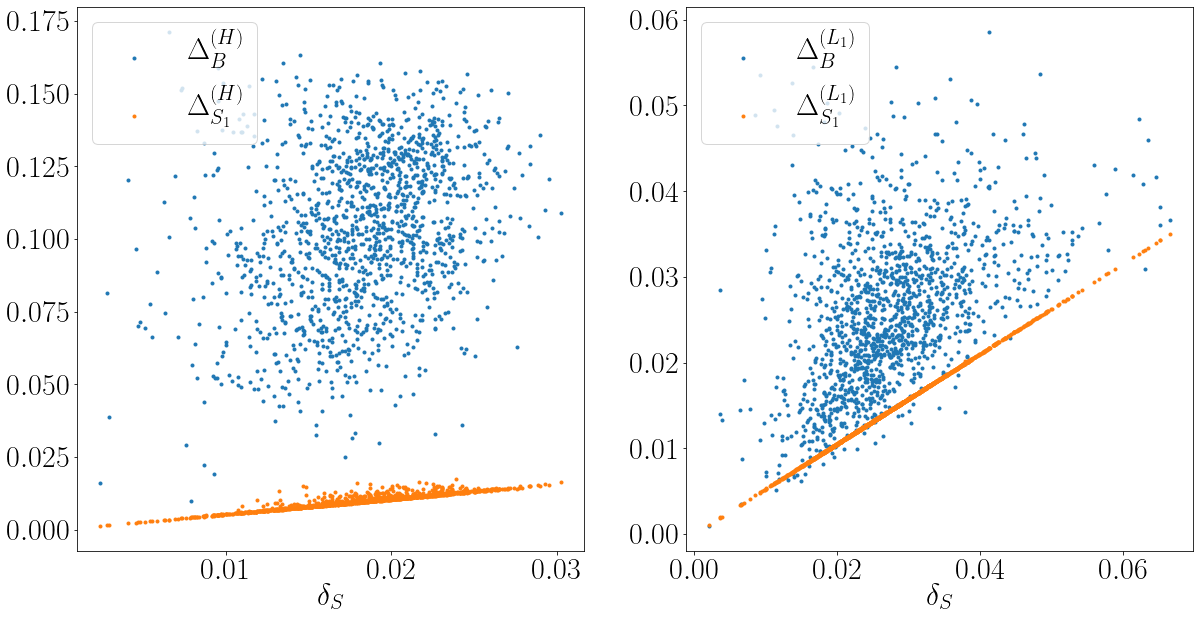

In [104]:
sizefont = 30
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': sizefont})
#matplotlib.rcParams['mathtext.fontset'] = 'custom'
#matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
#matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
#matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
#matplotlib.rcParams['text.usetex'] = True
print('fs1: ' + str(fs1)+ ', fs2: ' + str(fs2))
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].plot(distHs1s2,distHbtb,linewidth=0,label='$\Delta_{B}^{(H)}$',marker='.',color='tab:blue')
ax[0].plot(distHs1s2,distHs1ts,linewidth=0,label='$\Delta_{S}^{(H)}$',marker='.',color='tab:orange')
#ax[0].plot(distHs1s2,distHs2ts,linewidth=0,label='distH(s2_T,s_R)',marker='.')
ax[0].legend(loc='upper left');
ax[0].set_xlabel('$\delta_S$',fontsize=sizefont);
ax[1].plot(distLs1s2,distLbtb,linewidth=0,label='$\Delta_{B}^{(L_1)}$',marker='.')
ax[1].plot(distLs1s2,distLs1ts,linewidth=0,label='$$\Delta_{S_1}^{(L_1)}$$',marker='.')
#ax[1].plot(distLs1s2,distLs2ts,linewidth=0,label='distL1(s2_T,s_R)',marker='.')
ax[1].legend(loc='upper left');
ax[1].set_xlabel('$\delta_S$',fontsize=sizefont);

fs1: 0.45, fs2: 0.22


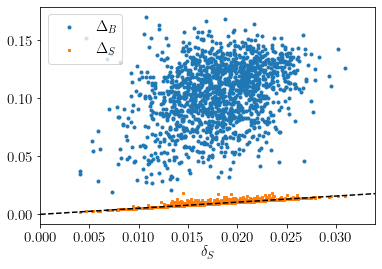

In [6]:
# single plot
sizefont = 15
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': sizefont})
#matplotlib.rcParams['mathtext.fontset'] = 'custom'
#matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
#matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
#matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
#matplotlib.rcParams['text.usetex'] = True
print('fs1: ' + str(fs1)+ ', fs2: ' + str(fs2))
#fig,ax = plt.subplots(1,2,figsize=(20,10))
plt.plot(figsize=1000)
plt.plot(distHs1s2,distHbtb,linewidth=0,label='$\Delta_{B}$',marker='.',color='tab:blue')
plt.plot(distHs1s2,distHs1ts,linewidth=0,label='$\Delta_{S}$',marker='s',markersize=2,color='tab:orange')
plt.plot(np.array([0,0.05]),(1-fs1)*fs2/(fs1-fs2)*np.array([0,0.05]),color='k',linestyle='dashed')
plt.legend(loc='upper left');
plt.xlim(left=0,right=max(distHs1s2)+0.003)
plt.xlabel('$\delta_S$',fontsize=sizefont);
plt.savefig("case1.png")
plt.show()

# Two $P_b$ and two $P_s$, but only averaging over noise
## We select two distributions that are mutually irreducible

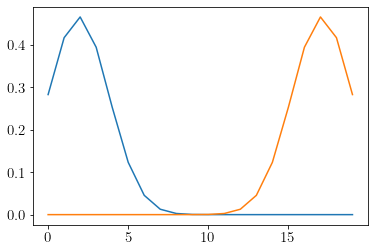

In [8]:
gaumean1=1
gausig1=1
gaumean2=9
gausig2=1
pdf1=[sc.norm.pdf(i,gaumean1,gausig1) for i in np.linspace(0,lg,nb)]
pdf2=[sc.norm.pdf(i,gaumean2,gausig2) for i in np.linspace(0,lg,nb)]
pdf1 = pdf1/summy(pdf1)
pdf2 = pdf2/summy(pdf2)
plt.plot(pdf1)
plt.plot(pdf2)

## First we make $\delta_B$ approach zero, matching case 1. 

In [9]:
dists1s2 = []
distb1b2 = []
distbtb = []
diststs = []
reconstrs = []
reconstrb = []
reconstrf1s = []
reconstrf2s = []
sizenoise=0.1
for u in range(10):
    ps1 = pdf1
    pb2 = pdf2
    sizenoiseb=sizenoise*2**(-u)
    #sizenoiseb=sizenoise
    for k in range(1000):
        xiks = xisub(sizenoise,nb,ps1)
        xikb = xisub(sizenoiseb,nb,pb2)
        ps2 = ps1*(1+xiks)
        pb1 = pb2*(1+xikb) 
        fs1 = 0.45
        fs2 = 0.22
        fb1 = 1-fs1
        fb2 = 1-fs2
        pm1 = fs1 * ps1 + fb1 * pb1
        pm2 = fs2 * ps2 + fb2 * pb2
        reconstrs.append(abs(demix(pm1,pm2)[0]))
        reconstrb.append(abs(demix(pm1,pm2)[1]))
        dists1s2.append(disth(np.abs(ps1),np.abs(ps2)))
        distb1b2.append(disth(np.abs(pb1),np.abs(pb2)))
        distbtb.append(disth(np.abs(reconstrb[-1]),np.abs(pb2)))
        diststs.append(disth(np.abs(reconstrs[-1]),np.abs(ps1)))
        reconstrf1s.append(demix(pm1,pm2)[2])
        reconstrf2s.append(demix(pm1,pm2)[3])

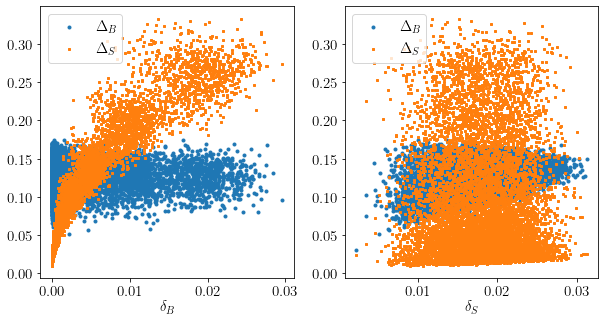

In [10]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': sizefont})
#plt.plot(dists1s2,distb1tb,linewidth=0,label='distL1(b1_T,b_R)',marker='.',color='tab:blue')
ax[0].plot(distb1b2,distbtb,linewidth=0,label='$\Delta_B$',marker='.',color='tab:blue')
ax[0].plot(distb1b2,diststs,linewidth=0,label='$\Delta_S$',marker='s',markersize=2,color='tab:orange')
ax[0].set_xlabel('$\delta_B$');
ax[1].plot(dists1s2,distbtb,linewidth=0,label='$\Delta_B$',marker='.',color='tab:blue')
ax[1].plot(dists1s2,diststs,linewidth=0,label='$\Delta_S$',marker='s', markersize=2,color='tab:orange')
ax[1].set_xlabel('$\delta_S$');
#plt.plot(dists1s2,dists2ts,linewidth=0,label='distL1(s2_T,s_R)',marker='.')
ax[1].legend(loc='upper left');
ax[0].legend(loc='upper left');

## We now take $\delta_B$ and $\delta_S$ around the same order

In [12]:
hdists1s2 = []
hdistb1b2 = []
hdistbtb = []
hdiststs = []
hreconstrs = []
hreconstrb = []
hreconstrf1s = []
hreconstrf2s = []
hsizenoise=0.1
for u in range(10):
    ps1 = pdf1
    pb2 = pdf2
    sizenoiseb=sizenoise
    #sizenoiseb=sizenoise
    for k in range(1000):
        xiks = xisub(sizenoise,nb,ps1)
        xikb = xisub(sizenoiseb,nb,pb2)
        ps2 = ps1*(1+xiks)
        pb1 = pb2*(1+xikb) 
        fs1 = 0.45
        fs2 = 0.22
        fb1 = 1-fs1
        fb2 = 1-fs2
        pm1 = fs1 * ps1 + fb1 * pb1
        pm2 = fs2 * ps2 + fb2 * pb2
        hreconstrs.append(abs(demix(pm1,pm2)[0]))
        hreconstrb.append(abs(demix(pm1,pm2)[1]))
        hdists1s2.append(disth(np.abs(ps1),np.abs(ps2)))
        hdistb1b2.append(disth(np.abs(pb1),np.abs(pb2)))
        hdistbtb.append(disth(np.abs(hreconstrb[-1]),np.abs(pb2)))
        hdiststs.append(disth(np.abs(hreconstrs[-1]),np.abs(ps1)))
        hreconstrf1s.append(demix(pm1,pm2)[2])
        hreconstrf2s.append(demix(pm1,pm2)[3])

# Figure 2: left panel has $\delta_B$ going to zero, right panel has $\delta_B \sim \delta_S$ 

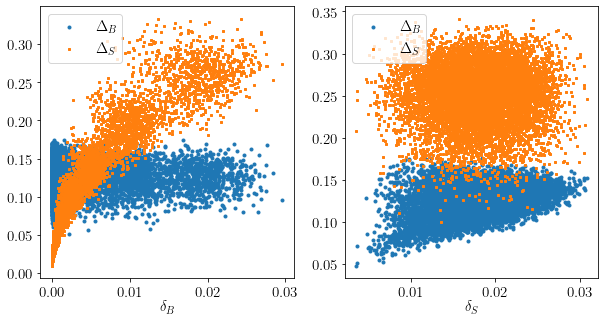

In [13]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': sizefont})
#plt.plot(dists1s2,distb1tb,linewidth=0,label='distL1(b1_T,b_R)',marker='.',color='tab:blue')
ax[0].plot(distb1b2,distbtb,linewidth=0,label='$\Delta_B$',marker='.',color='tab:blue')
ax[0].plot(distb1b2,diststs,linewidth=0,label='$\Delta_S$',marker='s',markersize=2,color='tab:orange')
ax[0].set_xlabel('$\delta_B$');
ax[1].plot(hdists1s2,hdistbtb,linewidth=0,label='$\Delta_B$',marker='.',color='tab:blue')
ax[1].plot(hdists1s2,hdiststs,linewidth=0,label='$\Delta_S$',marker='s', markersize=2,color='tab:orange')
ax[1].set_xlabel('$\delta_S$');
#plt.plot(dists1s2,dists2ts,linewidth=0,label='distL1(s2_T,s_R)',marker='.')
ax[1].legend(loc='upper left');
ax[0].legend(loc='upper left');
plt.savefig("case2.png")